Ce .ipynb applique les méthodes non-supervisé de ML pour essayer de répondre à la question de qualité de soudure. Les méthodes se divise en plusieurs parties :Clustering (centroid based, density based,distribution based,connectivity based), Anomaly detection,Dimensionality reduction,association rules ..

Avant d'arriver à l'étape des méthodes non-supervisé , il faut savoir que appliquer ces meéthodes sur 30 à 40 colonnes n'est pas idéale on see retrouve avec the curse of dimensionality.Ce qui pose un trés grand problème. Ainsi le but sera de choisir un subset idéale (identifier et à conserver un sous-ensemble pertinent des variables d'origine en utilisant soit best subset model ou stepwise model selection pour nous et d'appliquer la réduction de dimension

# Subset selection

 ## 1-Best subset model

La méthode de best subset model sous-entend avoir une variable cible , or ce n'est pas le cas de notre base de donnée actuelle. Cette méthode n'est donc pas applicable dans notre cas.

# 2-Stepwise model detection

Pour les mêmes raisons que précédemment, on ne peux pas appliquer le stepwise model dans notre cas . Un mooyende "sélectionner des variables cibles " est d'utiliser l'entropie ou la variancee pour sélectionner des features.

# 3-En utilisant la variance

Cette méthode élimine les features ayant une variance faible, car elles sont moins susceptibles de contenir des informations discriminantes.

In [220]:
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import VarianceThreshold

# Define the relative path to the '4 - Dataset' folder
dataset_dir = Path('../../4 - Dataset')
X = pd.read_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv')
print(X.dtypes)

# Appliquer la sélection par variance
# Fixer un seuil de variance minimale, ici 0.1 comme exemple
selector = VarianceThreshold(threshold=0.1)
X_var_selected = selector.fit_transform(X)

# Afficher les résultats
print(f"Features avant la sélection: {X.shape[1]}")
print(f"Features après la sélection: {X_var_selected.shape[1]}")

# Pour connaître quelles features ont été conservées
features_kept = X.columns[selector.get_support()]
print("Features conservées:", features_kept)


Carbon concentration (ppm)                      float64
Silicon concentration (ppm)                     float64
Manganese concentration (ppm)                   float64
Heat input (kJ/mm)                              float64
Interpass temperature (deg C)                   float64
Type of weld                                      int64
Sulphur concentration (ppm)                     float64
Phosphorus concentration (ppm)                  float64
Oxygen concentration (ppm)                      float64
Nitrogen concentration (ppm)                    float64
Current (A)                                     float64
Voltage (V)                                     float64
Post weld heat treatment temperature (deg C)    float64
Post weld heat treatment time (hours)           float64
AC or DC                                        float64
Electrode positive or negative                  float64
Nickel concentration (ppm)                      float64
Chromium concentration (ppm)                    

## 4-En utilisant l'entropie

In [221]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.feature_selection import VarianceThreshold

# Définir le chemin relatif vers le dossier '4 - Dataset'
dataset_dir = Path('../../4 - Dataset')
X = pd.read_csv(dataset_dir / 'clustering_weld_data_removed_outliers.csv')


def calculate_entropy(series):
    """Calculer l'entropie d'une série."""
    probs = series.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs + 1e-9) )  # Ajout d'un petit epsilon pour éviter la division par zéro

# Calculer l'entropie pour chaque feature
entropy_values = X.apply(calculate_entropy)

# Définir un seuil d'entropie minimal
entropy_threshold = 0.5  # Ce seuil peut être ajusté selon le besoin

# Sélectionner les features avec une entropie supérieure au seuil
features_kept_entropy = entropy_values[entropy_values > entropy_threshold].index.tolist()

# Afficher les résultats de la sélection par entropie
print(f"Features avant la sélection par entropie: {X.shape[1]}")
print(f"Features après la sélection par entropie: {len(features_kept_entropy)}")
print("Features conservées par entropie:", features_kept_entropy)


Features avant la sélection par entropie: 31
Features après la sélection par entropie: 29
Features conservées par entropie: ['Carbon concentration (ppm)', 'Silicon concentration (ppm)', 'Manganese concentration (ppm)', 'Heat input (kJ/mm)', 'Type of weld', 'Sulphur concentration (ppm)', 'Phosphorus concentration (ppm)', 'Oxygen concentration (ppm)', 'Nitrogen concentration (ppm)', 'Current (A)', 'Voltage (V)', 'Post weld heat treatment temperature (deg C)', 'Post weld heat treatment time (hours)', 'Electrode positive or negative', 'Nickel concentration (ppm)', 'Chromium concentration (ppm)', 'Molybdenum concentration (ppm)', 'Vanadium concentration (ppm)', 'Copper concentration (ppm)', 'Titanium concentration (ppm)', 'Aluminium concentration (ppm)', 'Boron concentration (ppm)', 'Niobium concentration (ppm)', 'Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)', 'Charpy temperature (deg C)', 'Charpy impact toughness (J)']


La sélection par entropie est recommande car j'ai des donnees categroeilles et numeriques.

## Réduction de dimension

On efface les colonnes qu'on a jugé non-nécessaire aveec l'entropie.

In [222]:
import pandas as pd
from pathlib import Path

# Définir le chemin relatif vers le fichier de données réel
dataset_dir = Path('../../4 - Dataset')
input_file_path = dataset_dir / 'clustering_weld_data_removed_outliers.csv'

# Charger les données réelles
X = pd.read_csv(input_file_path)

# Liste des features conservées (comme dans ton exemple)
features_kept = [
    'Carbon concentration (ppm)', 'Silicon concentration (ppm)', 
    'Manganese concentration (ppm)', 'Sulphur concentration (ppm)', 
    'Phosphorus concentration (ppm)', 'Nickel concentration (ppm)', 
    'Chromium concentration (ppm)', 'Molybdenum concentration (ppm)', 
    'Vanadium concentration (ppm)', 'Copper concentration (ppm)', 
    'Oxygen concentration (ppm)', 'Titanium concentration (ppm)', 
    'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)', 
    'Niobium concentration (ppm)', 'Current (A)', 'Voltage (V)', 
    'Heat input (kJ/mm)', 'Type of weld', 
    'Post weld heat treatment temperature (deg C)', 
    'Post weld heat treatment time (hours)', 
    'Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 
    'Elongation (%)', 'Reduction of Area (%)', 
    'Charpy temperature (deg C)', 'Charpy impact toughness (J)', 
    'Electrode positive or negative'
]

# Sélectionner seulement les colonnes nécessaires
selected_data = X[features_kept]

# Enregistrer les données filtrées dans un nouveau fichier CSV
output_file_path = dataset_dir / 'clustering_weld_data_selection.csv'
selected_data.to_csv(output_file_path, index=False)

print(f"Fichier enregistré sous : {output_file_path}")


Fichier enregistré sous : ../../4 - Dataset/clustering_weld_data_selection.csv


In [223]:
# Afficher les lignes et les colonnes où il y a des valeurs manquantes (NaN)
missing_values = selected_data.isna()

# Lister les colonnes avec des valeurs manquantes
columns_with_nan = selected_data.columns[selected_data.isna().any()].tolist()
print("Colonnes contenant des valeurs manquantes:", columns_with_nan)

# Afficher les lignes où il y a des NaN dans ces colonnes
rows_with_nan = selected_data[missing_values.any(axis=1)]
print("Lignes contenant des valeurs manquantes:")
print(rows_with_nan)

# Compter combien de valeurs manquantes dans chaque colonne
missing_per_column = selected_data.isna().sum()
print("\nNombre de valeurs manquantes par colonne:")
print(missing_per_column[missing_per_column > 0])


Colonnes contenant des valeurs manquantes: []
Lignes contenant des valeurs manquantes:
Empty DataFrame
Columns: [Carbon concentration (ppm), Silicon concentration (ppm), Manganese concentration (ppm), Sulphur concentration (ppm), Phosphorus concentration (ppm), Nickel concentration (ppm), Chromium concentration (ppm), Molybdenum concentration (ppm), Vanadium concentration (ppm), Copper concentration (ppm), Oxygen concentration (ppm), Titanium concentration (ppm), Nitrogen concentration (ppm), Aluminium concentration (ppm), Niobium concentration (ppm), Current (A), Voltage (V), Heat input (kJ/mm), Type of weld, Post weld heat treatment temperature (deg C), Post weld heat treatment time (hours), Yield strength (MPa), Ultimate tensile strength (MPa), Elongation (%), Reduction of Area (%), Charpy temperature (deg C), Charpy impact toughness (J), Electrode positive or negative]
Index: []

[0 rows x 28 columns]

Nombre de valeurs manquantes par colonne:
Series([], dtype: int64)


In [224]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_data)

# Appliquer le PCA après standardisation
algoPCA = PCA().fit(X_scaled)


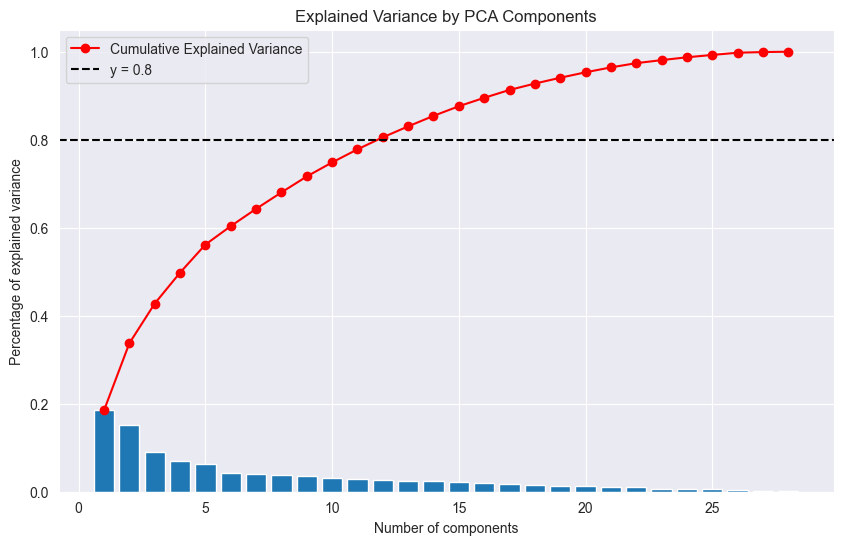

PCA results saved to 'clustering_pca_results.csv'


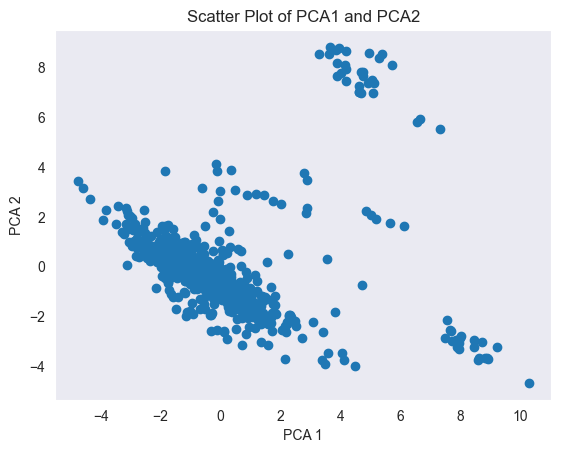

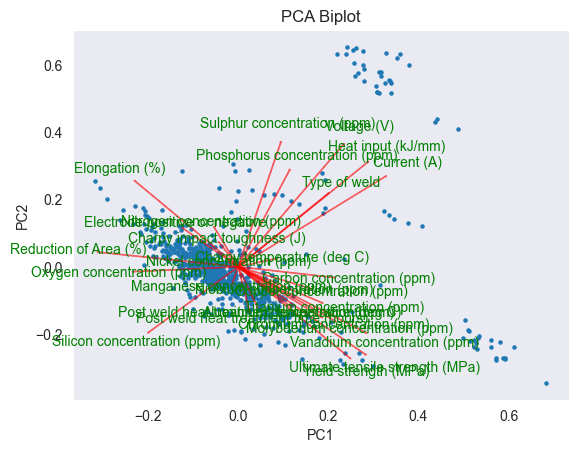

In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import numpy as np

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_data)  # Assurez-vous que 'selected_data' est défini

# Appliquer PCA
algoPCA = PCA().fit(X_scaled)

# Visualiser la variance expliquée par chaque composante
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(algoPCA.explained_variance_ratio_) + 1), algoPCA.explained_variance_ratio_)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Number of components')
plt.plot(range(1, len(algoPCA.explained_variance_ratio_) + 1),
         np.cumsum(algoPCA.explained_variance_ratio_),
         c='red', label="Cumulative Explained Variance", marker='o')
plt.axhline(y=0.8, color='black', linestyle='--', label='y = 0.8')
plt.legend(loc='upper left')
plt.title('Explained Variance by PCA Components')
plt.show()

# Appliquer PCA pour réduire à 11 dimensions
pcamodel = PCA(n_components=11)  # Choisir 11 composants
pca = pcamodel.fit_transform(X_scaled)  

# Enregistrer les résultats PCA dans un fichier CSV
pca_df = pd.DataFrame(data=pca, columns=[f'PC{i+1}' for i in range(pcamodel.n_components_)])
pca_df.to_csv('pca_results.csv', index=False)

print("PCA results saved to 'clustering_pca_results.csv'")



# Scatter plot de PCA1 et PCA2
plt.scatter(pca[:, 0], pca[:, 1])
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')
plt.title('Scatter Plot of PCA1 and PCA2')
plt.grid()
plt.show()

# 3D Scatter plot de PCA1, PCA2 et PCA3
fig1 = go.Scatter3d(
    x=pca[:, 0],
    y=pca[:, 1],
    z=pca[:, 2],
    marker=dict(opacity=0.9, reversescale=True, colorscale='Blues', size=5),
    line=dict(width=0.02),
    mode='markers'
)

# Layout Plotly
mylayout = go.Layout(scene=dict(
    xaxis=dict(title="PCA1"),
    yaxis=dict(title="PCA2"),
    zaxis=dict(title="PCA3"),
))

# Afficher le graphique 3D
fig = go.Figure(data=[fig1], layout=mylayout)
fig.show()

# PCA Biplot
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='green', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

# Créer le biplot
myplot(pca[:, :2], np.transpose(pcamodel.components_[:, :]), list(selected_data.columns))  # Utiliser les colonnes de selected_data
plt.title('PCA Biplot')
plt.show()


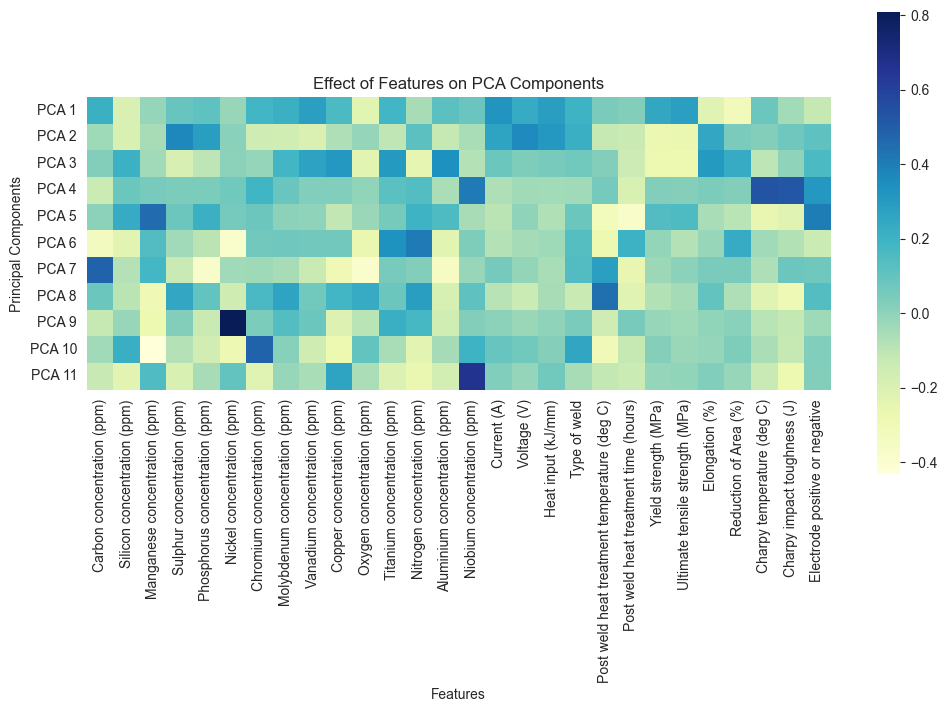

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_data)

# Appliquer PCA
pcamodel = PCA(n_components=11)  # Choisir 11 composants
pca_result = pcamodel.fit_transform(X_scaled)  # Utiliser X_scaled ici

# Heatmap des contributions des variables à chaque composante
plt.figure(figsize=(12, 6))
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=["PCA " + str(i + 1) for i in range(pcamodel.n_components_)],
                 xticklabels=list(selected_data.columns),
                 cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
ax.set_aspect("equal")
plt.title('Effect of Features on PCA Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()


On va commencer par le clustering en appliquant le KMEANS

# Clustering-KMEANS(centroid based)

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.utils import shuffle




In [228]:
import os

# Afficher le répertoire courant
print("Current working directory:", os.getcwd())


Current working directory: /Users/IreneETUDES/PycharmProjects/ApprentissageAutomatique/5 - Implementation ML/Methode non-supervise


In [229]:
import pandas as pd
from pathlib import Path

dataset_dir = Path('./')
pca_results_path = dataset_dir / 'pca_results.csv'  
df = pd.read_csv(pca_results_path)


# Afficher les dimensions des données
print(df.shape)  # Assurez-vous que cela correspond au bon format (n_samples, n_features)

# Pour cet exemple, nous allons supposer que vous utilisez les 3 premières colonnes pour la classification
data = df.iloc[:, :3].values  # Convertir en tableau NumPy

# 

(730, 11)


In [230]:
# Créer un DataFrame pour Plotly
plot_df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])

# Créer la visualisation 3D
fig = px.scatter_3d(plot_df, x='X', y='Y', z='Z', title='Visualisation 3D des Données')

# Afficher la figure
fig.show()

Avec le kmeans viens la question suivannte : Comment choisir le nombre finale de clusters? Comment savoir quelle nombre est pertinant ? On utilise alors deux méthodes : Elbow Method et Silhouette Score pour nous guider dans la décision.

Elbow method 

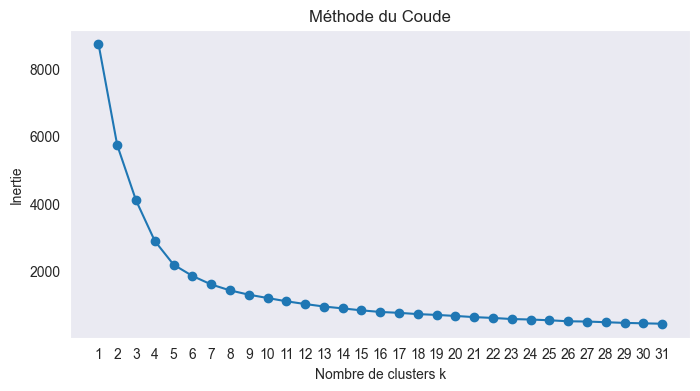

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Déterminer le nombre de clusters
inertia = []
k_values = range(1, 32)  # Par exemple, tester pour k de 1 à 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)  # Utilisez vos données ici
    inertia.append(kmeans.inertia_)

# Tracer le graphique
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie')
plt.xticks(k_values)
plt.grid()
plt.show()


Selon le graphe au dessus, on peut placer le nombre de cluster  4.

Le silhouette score 

Le silhouette score va être utilisé comme un moyen de vérifier la décision du nombre de clusters.

In [232]:
# Appliquer K-means
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++')
kmeans.fit(data)
labels = kmeans.labels_
# Obtenir les étiquettes prédites
pred = kmeans.predict(data)

# Afficher les étiquettes
print(pred)

# Les étiquettes des groupes
print(kmeans.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 0 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1
 1 1 0 2 2 1 1 1 1 1 1 1 

In [233]:
# Calculer le score de silhouette pour ce clustering
silhouette_avg = silhouette_score(data, labels)

print(f"Le score de silhouette moyen pour 4 clusters est : {silhouette_avg}")

Le score de silhouette moyen pour 4 clusters est : 0.6070180340465403


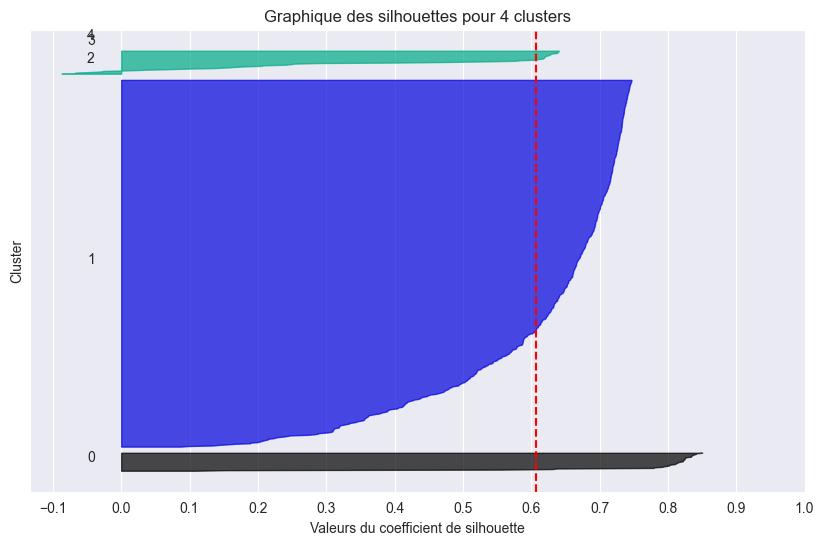

In [234]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Calculer les scores de silhouette pour chaque point
silhouette_values = silhouette_samples(data, labels)

# Initialiser le plot
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(5):  # Nombre de clusters
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Graphique des silhouettes pour 4 clusters")
ax.set_xlabel("Valeurs du coefficient de silhouette")
ax.set_ylabel("Cluster")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Pas besoin de labels y
ax.set_xticks([i/10 for i in range(-1, 11)])

plt.show()


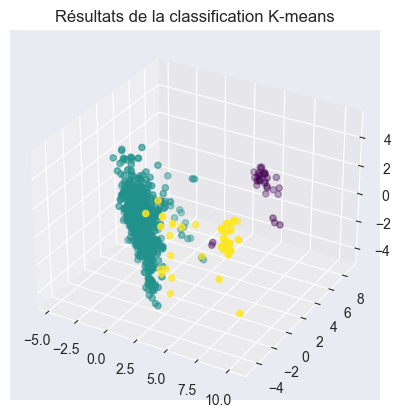

In [235]:
# Visualisation des résultats de classification
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=pred, cmap='viridis')  # Utiliser une palette de couleurs
plt.title("Résultats de la classification K-means")
plt.show()


In [236]:

plot_df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
plot_df['Cluster'] = pred

# Créer la visualisation 3D interactive
fig = px.scatter_3d(plot_df, x='X', y='Y', z='Z', color='Cluster', title='K-means Clustering',
                    color_continuous_scale=px.colors.sequential.Viridis)

# Afficher la figure
fig.show()

In [237]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, labels)
print(f'Silhouette Score: {silhouette_avg}')
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data, labels)
print(f'Davies-Bouldin Index: {db_index}')
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(data, labels)
print(f'Calinski-Harabasz Index: {ch_index}')
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')


Silhouette Score: 0.6070180340465403
Davies-Bouldin Index: 0.6512960499396767
Calinski-Harabasz Index: 412.9032180788718
Number of clusters: 3


# Clustering-DBSCAN(density based)

Étiquettes de clusters obtenues avec DBSCAN : [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0 -1  0 -1  0  0  0  2  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  3  0  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0 -1  0
 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  1  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0 -1  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  2  0  0  2  0  0  0  0  0 -1  0  2  0  2  0  0  0  0  0  3
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  1  0
  2  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  3
 -1  

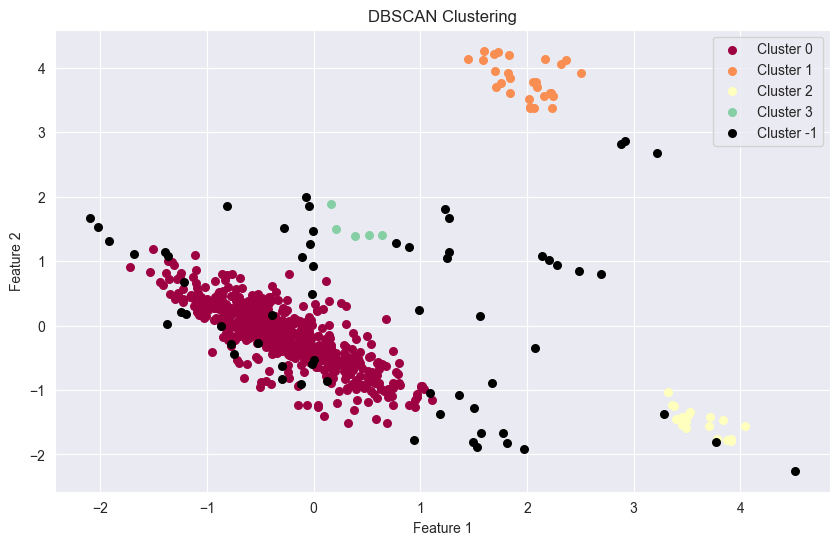

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from pathlib import Path


dataset_dir = Path('./')
pca_results_path = dataset_dir / 'pca_results.csv'  
df = pd.read_csv(pca_results_path)

# Pour cet exemple, nous allons supposer que vous utilisez les 3 premières colonnes pour la classification
data = df.iloc[:, :3].values  # Convertir en tableau NumPy

# Standardisation des données
data = StandardScaler().fit_transform(data)

# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajustez eps et min_samples selon vos données
labels = dbscan.fit_predict(data)

# Afficher les étiquettes
print(f"Étiquettes de clusters obtenues avec DBSCAN : {labels}")

# Visualisation des résultats de classification
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # -1 est utilisé pour les points considérés comme bruit
        col = 'k'  # Noir pour le bruit
    class_member_mask = (labels == k)
    xy = data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, color=col, label=f'Cluster {k}')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Visualisation 3D avec Plotly
plot_df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
plot_df['Cluster'] = labels

# Créer la visualisation 3D interactive
fig = px.scatter_3d(plot_df, x='X', y='Y', z='Z', color='Cluster', title='DBSCAN Clustering',
                    color_continuous_scale=px.colors.sequential.Viridis)

# Afficher la figure
fig.show()


In [239]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, labels)
print(f'Silhouette Score: {silhouette_avg}')
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data, labels)
print(f'Davies-Bouldin Index: {db_index}')
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(data, labels)
print(f'Calinski-Harabasz Index: {ch_index}')
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')


Silhouette Score: 0.34341790978886105
Davies-Bouldin Index: 1.6744393698622573
Calinski-Harabasz Index: 141.76789620886953
Number of clusters: 4


# Clustering-Hierarchal Clustering

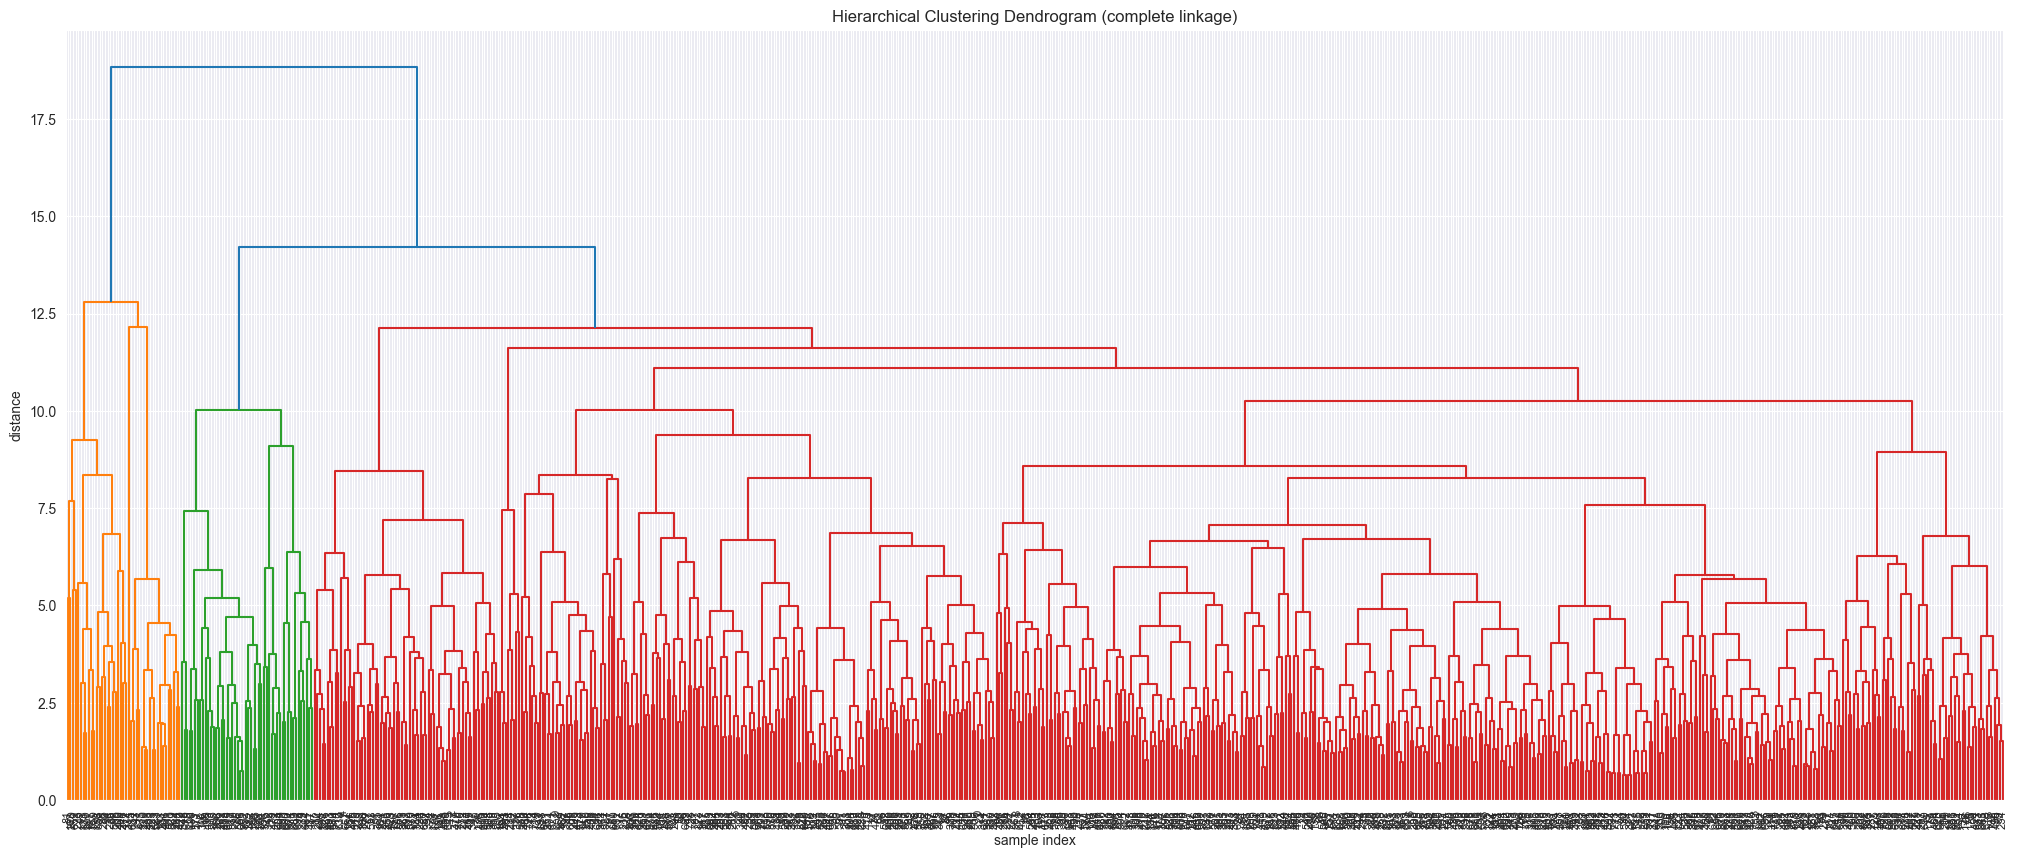

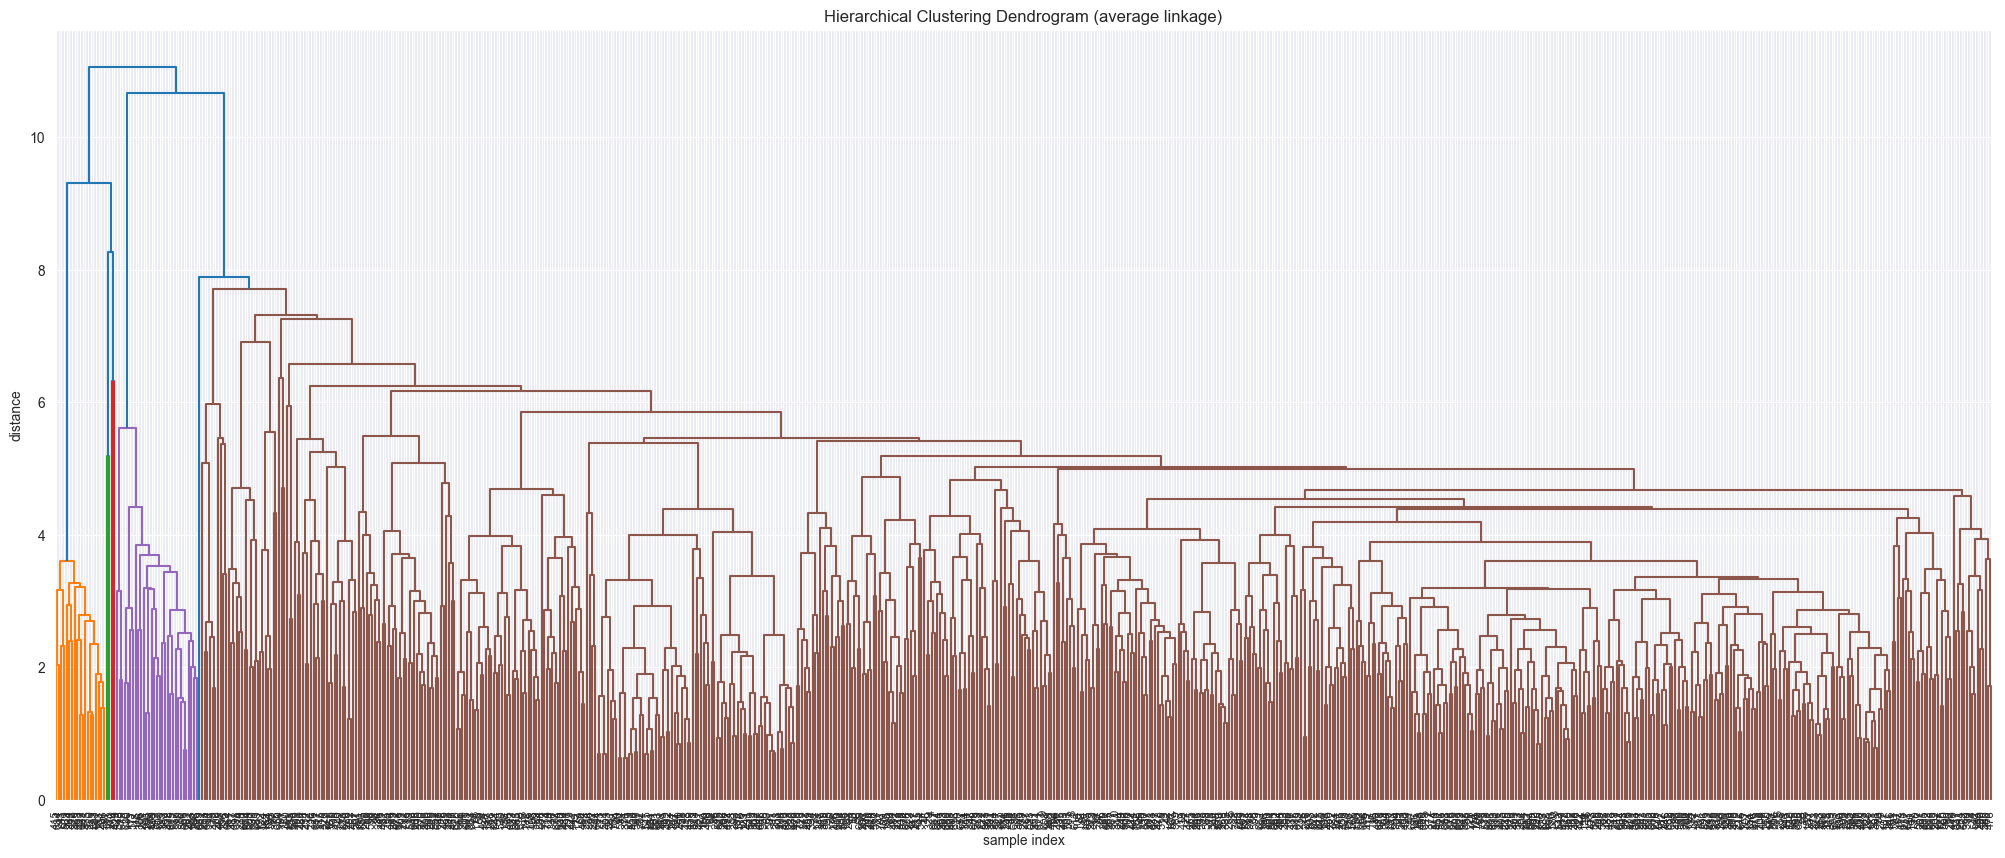

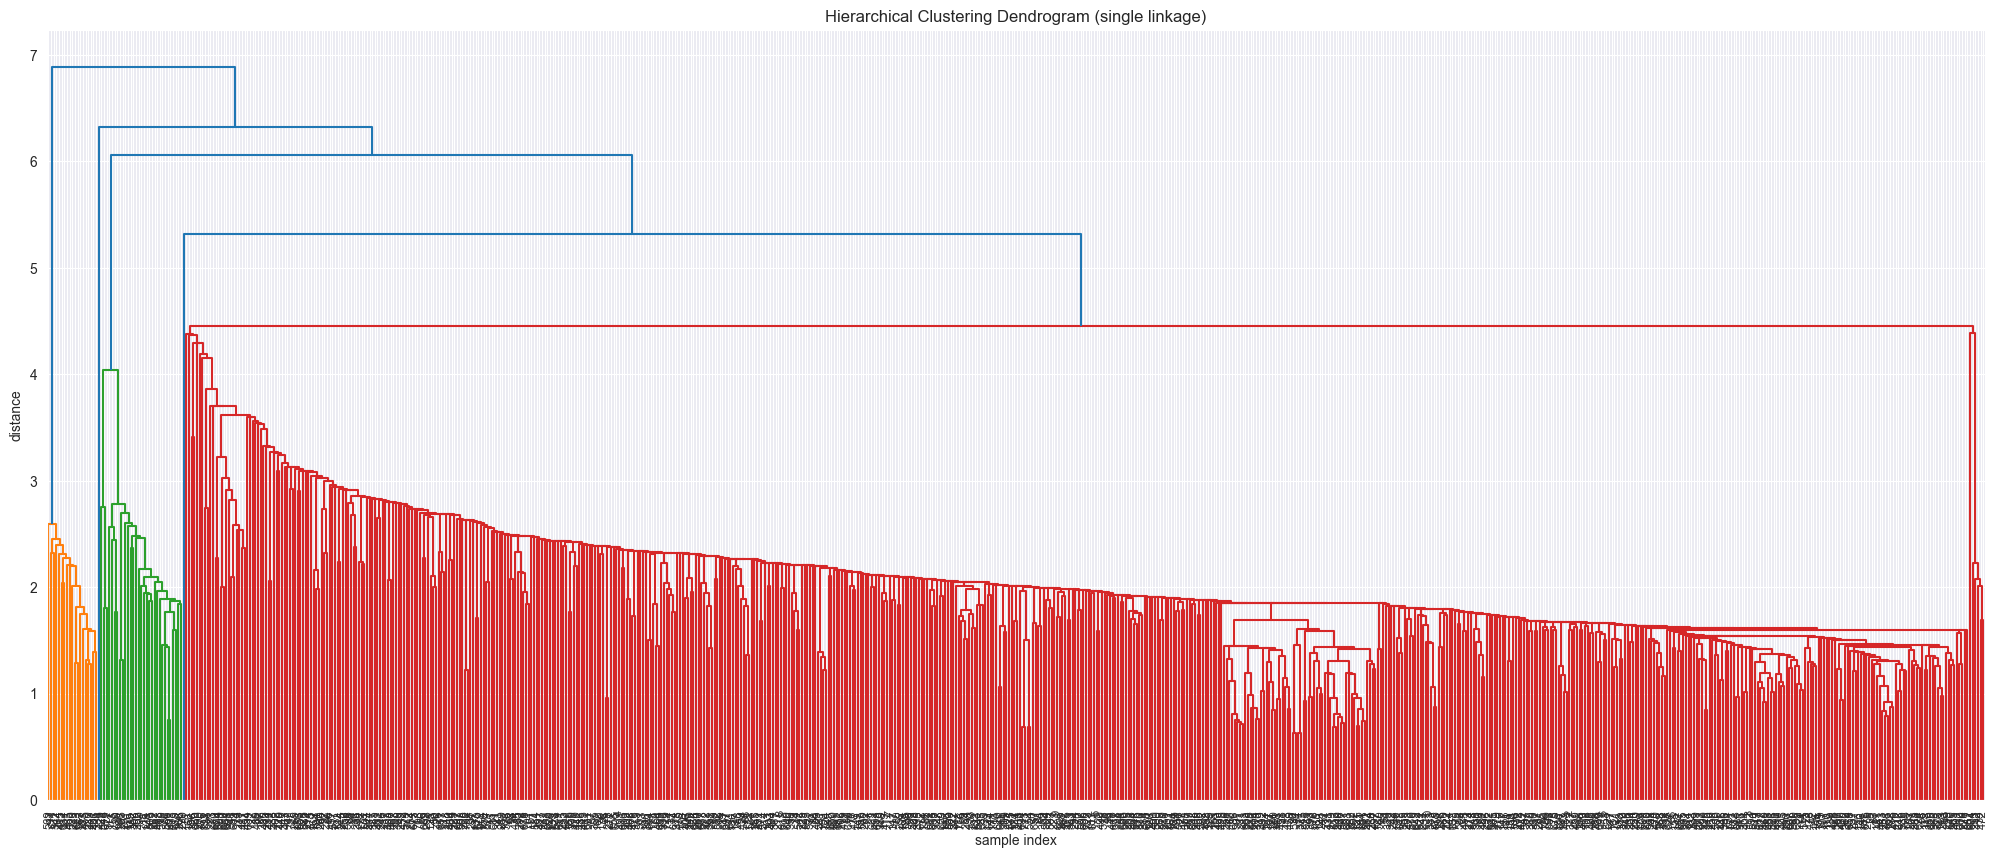

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn import metrics
from pathlib import Path

# Charger les résultats PCA
dataset_dir = Path('./')  # Assurez-vous que ce chemin est correct
pca_results_path = dataset_dir / 'pca_results.csv'
df = pd.read_csv(pca_results_path)

data = df.values  # Convertir en tableau NumPy

# Clustering hiérarchique avec différentes liaisons
hc_complete = linkage(data, "complete")
hc_average = linkage(data, "average")
hc_single = linkage(data, "single")

# Tracer le dendrogramme pour la liaison complète
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (complete linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotation des étiquettes de l'axe x
    leaf_font_size=8.,  # taille de la police pour les étiquettes de l'axe x
)
plt.show()

# Tracer le dendrogramme pour la liaison moyenne
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (average linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotation des étiquettes de l'axe x
    leaf_font_size=8.,  # taille de la police pour les étiquettes de l'axe x
)
plt.show()

# Tracer le dendrogramme pour la liaison simple
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (single linkage)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotation des étiquettes de l'axe x
    leaf_font_size=8.,  # taille de la police pour les étiquettes de l'axe x
)
plt.show()

